<a href="https://colab.research.google.com/github/KolbeCer/A.I./blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW3

##Problem 1

In [0]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt
from random import *

In [0]:
# function to generate random data for logistic regression with two features
def get_random_data(w, b, mu, sigma, m):

  data_temp = []
  labels_temp = []
  i = 0

  # 0 to m-1
  while (i < m):
    ran_c = random()
    # c is 1 50% of the time and 0 the other 50%
    if (ran_c > 0.5):
      c = 1
    else:
      c = 0

    # Get a uniform x 
    x_1 = np.random.uniform(low=0.0, high=1.0)
    
    # noise chosen based on normal distribution
    n = np.random.normal(mu, sigma, 1)
    x_2 = w * x_1 + b + (np.power(-1, c)) * n

    # append to the data  x_1 and x_2
    data_temp.append([x_1, x_2[0]])

    # append c to labels
    labels_temp.append([c])
    i += 1

  # Convert lists into np arrays of (m,2) and (m,1)
  data = np.array(data_temp, ndmin=2)
  labels = np.array(labels_temp, ndmin=1)

  return(data, labels)

In [0]:
# display points in data seperated by their 
def display_random_data(data, labels, w, b):

  # Get the x and y points from data array
  points = np.column_stack(data)
  x_s = points[0]
  y_s = points[1]

  plt.xlabel('x', color='black')
  plt.ylabel('y', color='black')
  plt.grid()

  # plot for all points
  for point_and_label in zip(x_s, y_s, labels):
    if (point_and_label[2] == 0):
      plt.scatter(point_and_label[0], point_and_label[1], color='blue') # blue for c = 0
    else:
      plt.scatter(point_and_label[0], point_and_label[1], color='red') # red for c = 1

  # Plots the seperating line
  x = np.linspace(0, 1)
  y = w * x + b

  plt.plot(x, y, color='green')

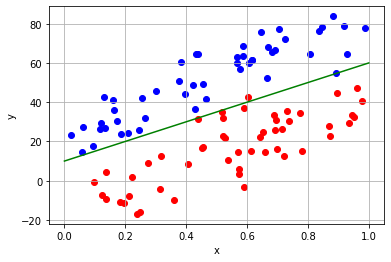

In [17]:
data, labels = get_random_data(50, 10, 20, 10, 100)
display_random_data(data, labels, 50, 10)

##Problem 2

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
import seaborn as sns
from keras import layers
import seaborn as sb

In [0]:
from sklearn.model_selection import train_test_split

X = data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_size, X_temp = X_train.shape


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation

network = tf.keras.models.Sequential()

network.add(tf.keras.layers.Dense(1, activation='sigmoid', input_dim=2))

network.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics=['accuracy'])

network.fit(X_train, y_train, epochs = 1000, batch_size=10)  

Epoch 1/1000
8/8 [==============================] - 0s 2ms/step - loss: 5.7478 - accuracy: 0.6625
Epoch 2/1000
8/8 [==============================] - 0s 1ms/step - loss: 1.7553 - accuracy: 0.6250
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7421 - accuracy: 0.5375
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.6151 - accuracy: 0.5250
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.2066 - accuracy: 0.6000
Epoch 6/1000
8/8 [==============================] - 0s 1ms/step - loss: 1.0670 - accuracy: 0.6125
Epoch 7/1000
8/8 [==============================] - 0s 1ms/step - loss: 1.0848 - accuracy: 0.5750
Epoch 8/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.9102 - accuracy: 0.5375
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.5125
Epoch 10/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.8135 - accuracy: 0.5625
Epoch 11/1000
8/8 [

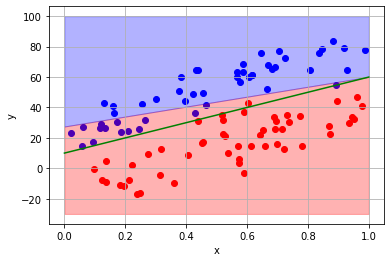

In [21]:
weights = network.layers[0].get_weights()[0]
biases = network.layers[0].get_weights()[1]

display_random_data(data, labels, 50, 10)
x = np.linspace(0, 1)
y = (-(biases/weights[1]) / (biases / weights[0])) * x + (-biases / weights[1])

#p1 = mpatches.Patch(color='green', label='Actual Line')
#p2 = mpatches.Patch(color='purple', label='Model Line')
#plt.legend(handles=[p1,p2])
plt.fill_between(x, -30,y, color='red',alpha=0.3)
plt.fill_between(x, y,100, color='blue',alpha=0.3)


##Problem 3

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [0]:
def loss_cross_entropy(y_pred, t):
    return -np.mean(t*np.log(y_pred)+(1-t)*np.log(1-y_pred))

In [24]:
epoch = 500

X = data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_size, X_temp = X_train.shape

np.random.seed(0)
W = np.random.uniform(0,1,size=(X_train.shape[1],1))
b=0.5

loss_history = []

for i in range(epoch):
    Z = np.dot(X_train, W) + b
    Y_output = sigmoid(Z)
    curr_loss = loss_cross_entropy(Y_output,y_train)
    loss_history.append(curr_loss)
    grad= Y_output - y_train
    grad_weight= np.dot(X_train.T,grad)/X_train.shape[0]
    grad_bias = np.average(grad)
    W=W-.01*grad_weight
    b=b-.01*grad_bias

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


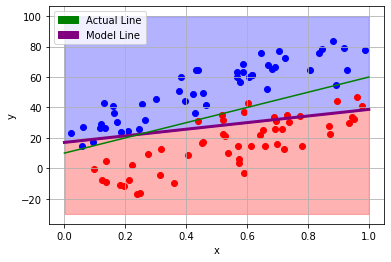

In [25]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_test, np.ravel(y_test))
#b
intercept = model.intercept_
#w1 & w2
x = np.linspace(0, 1)
b1 = model.coef_
w1 = b1[0][0]
w2 = b1[0][1]
b = intercept
m = -(b / w2) / (b / w1)
y_intercept = -b / w2

y = m*x + y_intercept
plt.plot(x, y, 'purple', linewidth = 3)

p1 = mpatches.Patch(color='green', label='Actual Line')
p2 = mpatches.Patch(color='purple', label='Model Line')
plt.legend(handles=[p1,p2])

plt.fill_between(x, -30, y, color='red', alpha=0.3)
plt.fill_between(x, y, 100, color='blue', alpha=0.3)

display_random_data(data, labels, 50, 10)

##Sources


*   https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf
*   https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
*   https://kraj3.com.np/blog/2019/08/logistic-regression-algorithm-from-scratch-in-pythonusing-numpy-only/
*   https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f
*   https://pythonprogramming.net/colors-fills-matplotlib-tutorial/
*   https://mc.ai/simple-binary-classification-with-keras/
*   https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f
*   https://aigeekprogrammer.com/binary-classification-using-logistic-regression-and-keras/
*   https://medium.com/@michaelscheinfeild/deep-learning-with-keras-d219ce43d5cb
*   https://kraj3.com.np/blog/2019/08/logistic-regression-algorithm-from-scratch-in-pythonusing-numpy-only/

